<a href="https://colab.research.google.com/github/owenc8/CV_Project_freshVSrotten/blob/test/CV_project_bananas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To-DO
#Convert Txt files to XML and run the code below
#train the data
# -
# -
# get code from: ComputerVisionProject.ipynb and
# YOLOv8_Tutorial.ipynb

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

In [7]:
test_dir = '/content/drive/MyDrive/LabFruit/Test'
train_dir = '/content/drive/MyDrive/LabFruit/Train'

In [ ]:
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/images')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/labels')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/images/train')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/images/val')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/labels/train')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/labels/val')

In [8]:
label_dir= "/content/drive/MyDrive/LabFruit/Final_data/labels"
image_dir="/content/drive/MyDrive/LabFruit/Final_data/images"

In [ ]:
#import shutil
#run it once for copying!
for file in os.listdir(train_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(train_dir, file), os.path.join(label_dir, "train"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(train_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"train", new_filename), "JPEG")
        #shutil.copy(os.path.join(train_dir, file), os.path.join(image_dir, "train"))


#Copy XML files and jpg files from the test folder to the folders created.
for file in os.listdir(test_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(test_dir, file), os.path.join(label_dir, "val"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(test_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"val", new_filename), "JPEG")
        #shutil.copy(os.path.join(test_dir, file), os.path.join(image_dir, "val"))

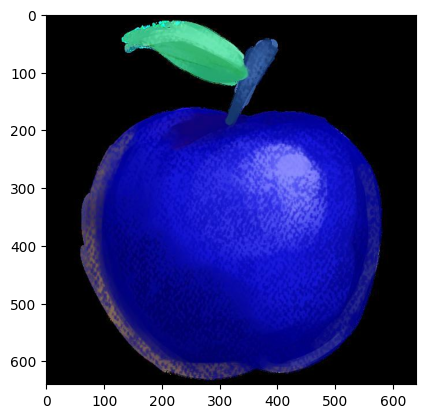

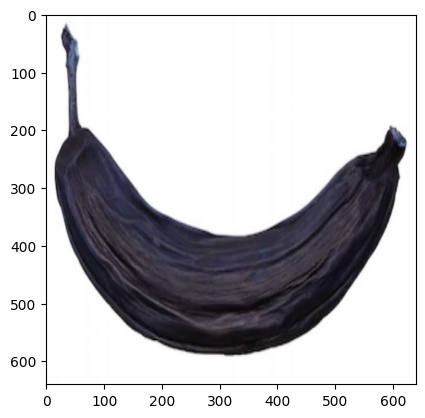

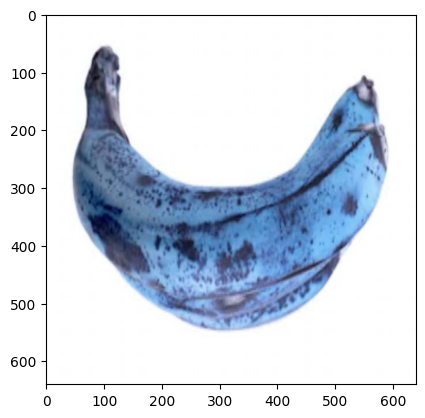

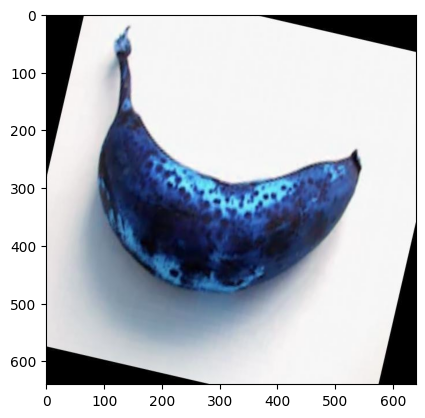

In [9]:
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train"))):
    img = cv2.imread(os.path.join(image_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [10]:
df = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}


#This is the way to handle xml format files which are in heirarchial form (trees).

for idx, anno in enumerate(glob.glob(label_dir+"/train" + '/*.xml')):

    trees = ET.parse(anno)

    print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    df['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]

Streaming output truncated to the last 5000 lines.
<Element 'segmented' at 0x7cc288542a20>
<Element 'object' at 0x7cc288543c40>
<Element 'name' at 0x7cc288541210>
<Element 'pose' at 0x7cc288542bb0>
<Element 'truncated' at 0x7cc2885405e0>
<Element 'difficult' at 0x7cc2885434c0>
<Element 'occluded' at 0x7cc288541ad0>
<Element 'bndbox' at 0x7cc288540bd0>
<Element 'xmin' at 0x7cc288542660>
<Element 'xmax' at 0x7cc288540810>
<Element 'ymin' at 0x7cc2885428e0>
<Element 'ymax' at 0x7cc288540630>
/content/drive/MyDrive/LabFruit/Final_data/labels/train/apple_67_jpg.rf.81351b4465c6209dc2b3c52bbdc20c3f.xml
<Element 'annotation' at 0x7cc288541670>
<Element 'folder' at 0x7cc2885422f0>
<Element 'filename' at 0x7cc288542c00>
<Element 'path' at 0x7cc288541620>
<Element 'source' at 0x7cc288542c50>
<Element 'database' at 0x7cc288543ba0>
<Element 'size' at 0x7cc288540d60>
<Element 'width' at 0x7cc2885426b0>
<Element 'height' at 0x7cc288542d40>
<Element 'depth' at 0x7cc288543650>
<Element 'segmented' at 0

In [11]:
df2 = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}

for idx, anno in enumerate(glob.glob(label_dir+"/val" + '/*.xml')):

    trees = ET.parse(anno)

    #print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        #print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df2['label'] += [label]
                    df2['width'] += [width]
                    df2['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]]
                    df2['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df2['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df2['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df2['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df2['ymax'] += [ymax]

In [12]:
import pandas as pd
train_df = pd.DataFrame(df)
val_df=pd.DataFrame(df2)
#df1.head()
val_df.head()

name          label  width  \
0  Screen-Shot-2018-06-08-at-2-28-23-PM_png.rf.47...   rotten_apple    640   
1                                             t_r029  rotten_tomato    196   
2                                             t_r027  rotten_tomato    196   
3   apple_80_jpg.rf.0c63ab610d655ece731c4afd08c694e4          apple    640   
4  Screen-Shot-2018-06-08-at-2-29-33-PM_png.rf.78...   rotten_apple    640   

   height  xmin  ymin  xmax  ymax  
0     640    75    49   562   602  
1     170    72    58   136   118  
2     170    34    53   166   112  
3     640   165   134   483   558  
4     640    76    45   543   567

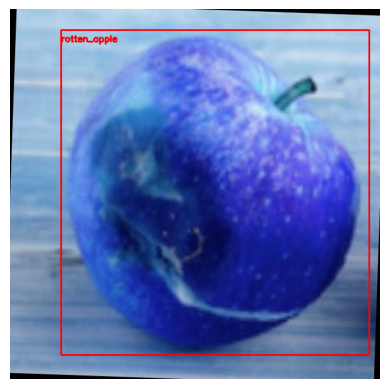

In [13]:
index= 10 #picture to visualize

#import cv2
image = cv2.imread(os.path.join(image_dir,"train", train_df["name"][index]+".jpg"), 1)
# Draw rectangle
cv2.rectangle(image, (train_df['xmin'][index], train_df['ymin'][index]), (train_df['xmax'][index], train_df['ymax'][index]), (255, 0, 0), 2)
# Put label (class_id) near the bbox
label = train_df["label"][index]
cv2.putText(image, str(label), (train_df['xmin'][index], train_df['ymin'][index]+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
# Display image
plt.imshow(image)
plt.axis('off')
plt.show()

In [14]:
train_df["name"][index]
filtered_df = train_df[train_df['name'] == train_df["name"][index]]
print(filtered_df)

                                                 name         label  width  \
10  Screen-Shot-2018-06-07-at-2-50-52-PM_png.rf.2a...  rotten_apple    640   

    height  xmin  ymin  xmax  ymax  
10     640    88    36   621   598  


In [15]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    290 non-null    object
 1   label   290 non-null    object
 2   width   290 non-null    int64 
 3   height  290 non-null    int64 
 4   xmin    290 non-null    int64 
 5   ymin    290 non-null    int64 
 6   xmax    290 non-null    int64 
 7   ymax    290 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 18.2+ KB


In [16]:
print(train_df['label'].unique())
print(val_df['label'].unique())

['rotten-banana' 'rotten_apple' 'rotten-orange' 'banana' 'orange' 'apple'
 'rotten_tomato' 'tomato']
['rotten_apple' 'rotten_tomato' 'apple' 'rotten-orange' 'orange' 'banana'
 'rotten-banana' 'tomato']


In [17]:
label_map = { 'apple': 0,
            'rotten_apple': 1,
            'banana': 2,
              'rotten-banana':3,
              'orange': 4,
              'rotten-orange': 5,
              'tomato': 6,
              'rotten_tomato' : 7}

train_df['class'] = train_df['label'].map(label_map)
val_df['class'] = val_df['label'].map(label_map)

In [18]:
# Training data
train_df['x_center'] = (train_df['xmin']+train_df['xmax'])/(2*train_df["width"])
train_df['y_center'] = (train_df['ymin']+train_df['ymax'])/(2*train_df["height"])
train_df['box_width'] = (train_df['xmax']-train_df['xmin'])/ train_df["width"]
train_df['box_height'] = (train_df['ymax']-train_df['ymin'])/train_df["height"]

#Validation data
val_df['x_center'] = (val_df['xmin']+val_df['xmax'])/(2*val_df["width"])
val_df['y_center'] = (val_df['ymin']+val_df['ymax'])/(2*val_df["height"])
val_df['box_width'] = (val_df['xmax']-val_df['xmin'])/ val_df["width"]
val_df['box_height'] = (val_df['ymax']-val_df['ymin'])/val_df["height"]

In [21]:
train_df.head(2271)

name          label  width  \
0     Screen-Shot-2018-06-12-at-8-49-59-PM_png.rf.19...  rotten-banana    640   
1     Screen-Shot-2018-06-12-at-8-54-14-PM_png.rf.8a...  rotten-banana    640   
2     Screen-Shot-2018-06-12-at-8-54-14-PM_png.rf.8a...  rotten-banana    640   
3     Screen-Shot-2018-06-12-at-8-54-14-PM_png.rf.8a...  rotten-banana    640   
4     Screen-Shot-2018-06-12-at-8-54-14-PM_png.rf.8a...  rotten-banana    640   
...                                                 ...            ...    ...   
2266  Screen-Shot-2018-06-12-at-9-02-09-PM_png.rf.bf...  rotten-banana    640   
2267  Screen-Shot-2018-06-12-at-9-02-32-PM_png.rf.0d...  rotten-banana    640   
2268  Screen-Shot-2018-06-12-at-9-02-32-PM_png.rf.0d...  rotten-banana    640   
2269  Screen-Shot-2018-06-12-at-9-02-32-PM_png.rf.0d...  rotten-banana    640   
2270  Screen-Shot-2018-06-12-at-9-02-15-PM_png.rf.39...  rotten-banana    640   

      height  xmin  ymin  xmax  ymax  class  x_center  y_center  box_width  \
0        640    42   102   565   586      3  0.474219  0.537500   0.817187   
1        640   200    37   532   113      3  0.571875  0.117188   0.518750   
2        640   163   122   541   241      3  0.550000  0.283594   0.590625   
3        640   215   246   588   371      3  0.627344  0.482031   0.582812   
4        640   185   382   562   514      3  0.583594  0.700000   0.589063   
...      ...   ...   ...   ...   ...    ...       ...       ...        ...   
2266     640     1    32   408   537      3  0.319531  0.444531   0.635938   
2267     640   253     1   641   604      3  0.698438  0.472656   0.606250   
2268     640    89    34   532   590      3  0.485156  0.487500   0.692187   
2269     640     1    63   437   499      3  0.342187  0.439063   0.681250   
2270     640   371    32   593   641      3  0.753125  0.525781   0.346875   

      box_height  
0       0.756250  
1       0.118750  
2       0.185938  
3       0.195312  
4       0.206250  
...          ...  
2266    0.789062  
2267    0.942187  
2268    0.868750  
2269    0.681250  
2270    0.951562  

[2271 rows x 13 columns]

In [22]:
#training
print("before deleting (train data): " , train_df.shape)
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
print("after deleting(train_data): " ,train_df.shape)

#validation
print("before deleting (val data): " , val_df.shape)
val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
val_df.dropna(inplace=True)
print("after deleting(val data): " , val_df.shape)

before deleting (train data):  (3271, 13)
after deleting(train_data):  (3271, 13)
before deleting (val data):  (290, 13)
after deleting(val data):  (290, 13)


In [23]:
train_df = train_df.astype(str)
val_df = val_df.astype(str)

In [24]:
#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{name}.txt', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{name}.txt', 'w') as file:
            file.write(text)

DETECTION WITH YOLO

In [25]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [26]:
from ultralytics import YOLO

In [27]:
model = YOLO('yolov8s.pt') # pretrained model

100%|██████████| 21.5M/21.5M [00:00<00:00, 80.2MB/s]


In [28]:
%%writefile config.yaml
path: /content/drive/MyDrive/LabFruit/Final_data
train: /content/drive/MyDrive/LabFruit/Final_data/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/LabFruit/Final_data/images/val

# Classes
nc: 8 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: apple
  1: rotten_apple
  2: banana
  3: rotten-banana
  4: orange
  5: rotten-orange
  6: tomato
  7: rotten_tomato


  # label_map = { 'apple': 0,
  #           'rotten_apple': 1,
  #           'banana': 2,
  #             'rotten-banana':3,
  #             'orange': 4,
  #             'rotten-orange': 5,
  #             'tomato': 6,
  #             'rotten_tomato' : 7}

Writing config.yaml


In [29]:
#they said to look at yolo training docs before doing this
#https://docs.ultralytics.com/modes/train/

#epochs: Total number of training epochs. Each epoch represents a full pass over the entire dataset. Adjusting this value can affect training duration and model performance
#patience:Number of epochs to wait without improvement in validation metrics before early stopping the training. Helps prevent overfitting by stopping training when performance plateaus.
#batch size: Batch size, with three modes: set as an integer (e.g., batch=16), auto mode for 60% GPU memory utilization (batch=-1), or auto mode with specified utilization fraction (batch=0.70).
#lr0: Initial learning rate (i.e. SGD=1E-2, Adam=1E-3) . Adjusting this value is crucial for the optimization process, influencing how rapidly model weights are updated.
#imgsz: Target image size for training. All images are resized to this dimension before being fed into the model. Affects model accuracy and computational complexity.

model.train(data="config.yaml",epochs=5,patience=4,batch=16, lr0=0.001,imgsz=640)

#default
# model.train(data="config.yaml",epochs=5,patience=5,batch=8, lr0=0.0005,imgsz=640)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=4, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

100%|██████████| 755k/755k [00:00<00:00, 19.0MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1cBeqvme_LqNmUkIRPqdXNYU24Uk1ADsX/LabFruit/Final_data/labels/train.cache... 2013 images, 15 backgrounds, 0 corrupt: 100%|██████████| 2028/2028 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/.shortcut-targets-by-id/1cBeqvme_LqNmUkIRPqdXNYU24Uk1ADsX/LabFruit/Final_data/labels/val.cache... 201 images, 1 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.04G      1.197      2.374      1.626         52        640: 100%|██████████| 127/127 [08:01<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]

                   all        202        290      0.753       0.46      0.542      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5       3.9G      1.092       1.25      1.487         41        640: 100%|██████████| 127/127 [00:52<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        202        290      0.741      0.542      0.637       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      4.06G       1.05      1.135      1.466         41        640: 100%|██████████| 127/127 [00:52<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        202        290      0.763      0.656      0.708      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.08G      1.018      1.014      1.435         43        640: 100%|██████████| 127/127 [00:53<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        202        290       0.68       0.79      0.784      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.02G     0.9188     0.8555      1.352         33        640: 100%|██████████| 127/127 [00:57<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        202        290      0.804      0.895      0.898      0.612



5 epochs completed in 0.203 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


                   all        202        290      0.802      0.896      0.897       0.61
                 apple         26         33      0.857          1      0.956      0.755
          rotten_apple         48         48          1      0.955      0.994      0.897
                banana         25         50      0.636      0.733      0.701      0.354
         rotten-banana         47         82      0.762       0.82      0.859      0.471
                orange         20         28      0.924      0.857       0.94      0.692
         rotten-orange         35         37      0.857      0.973       0.99      0.862
                tomato          6          6      0.728          1      0.901      0.511
         rotten_tomato          6          6      0.651      0.833      0.838       0.34
Speed: 0.6ms preprocess, 4.9ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cc1780a7dc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [30]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/1cBeqvme_LqNmUkIRPqdXNYU24Uk1ADsX/LabFruit/Final_data/labels/val.cache... 201 images, 1 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.28it/s]


                   all        202        290      0.804      0.896      0.898      0.608
                 apple         26         33      0.857          1      0.956      0.748
          rotten_apple         48         48          1      0.955      0.994      0.897
                banana         25         50      0.635       0.73      0.702      0.356
         rotten-banana         47         82      0.771       0.82      0.861      0.471
                orange         20         28      0.924      0.857      0.941      0.701
         rotten-orange         35         37      0.857      0.973       0.99      0.865
                tomato          6          6      0.734          1      0.901      0.511
         rotten_tomato          6          6      0.651      0.833      0.838      0.319
Speed: 0.4ms preprocess, 10.1ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train2


0.8959420019650985

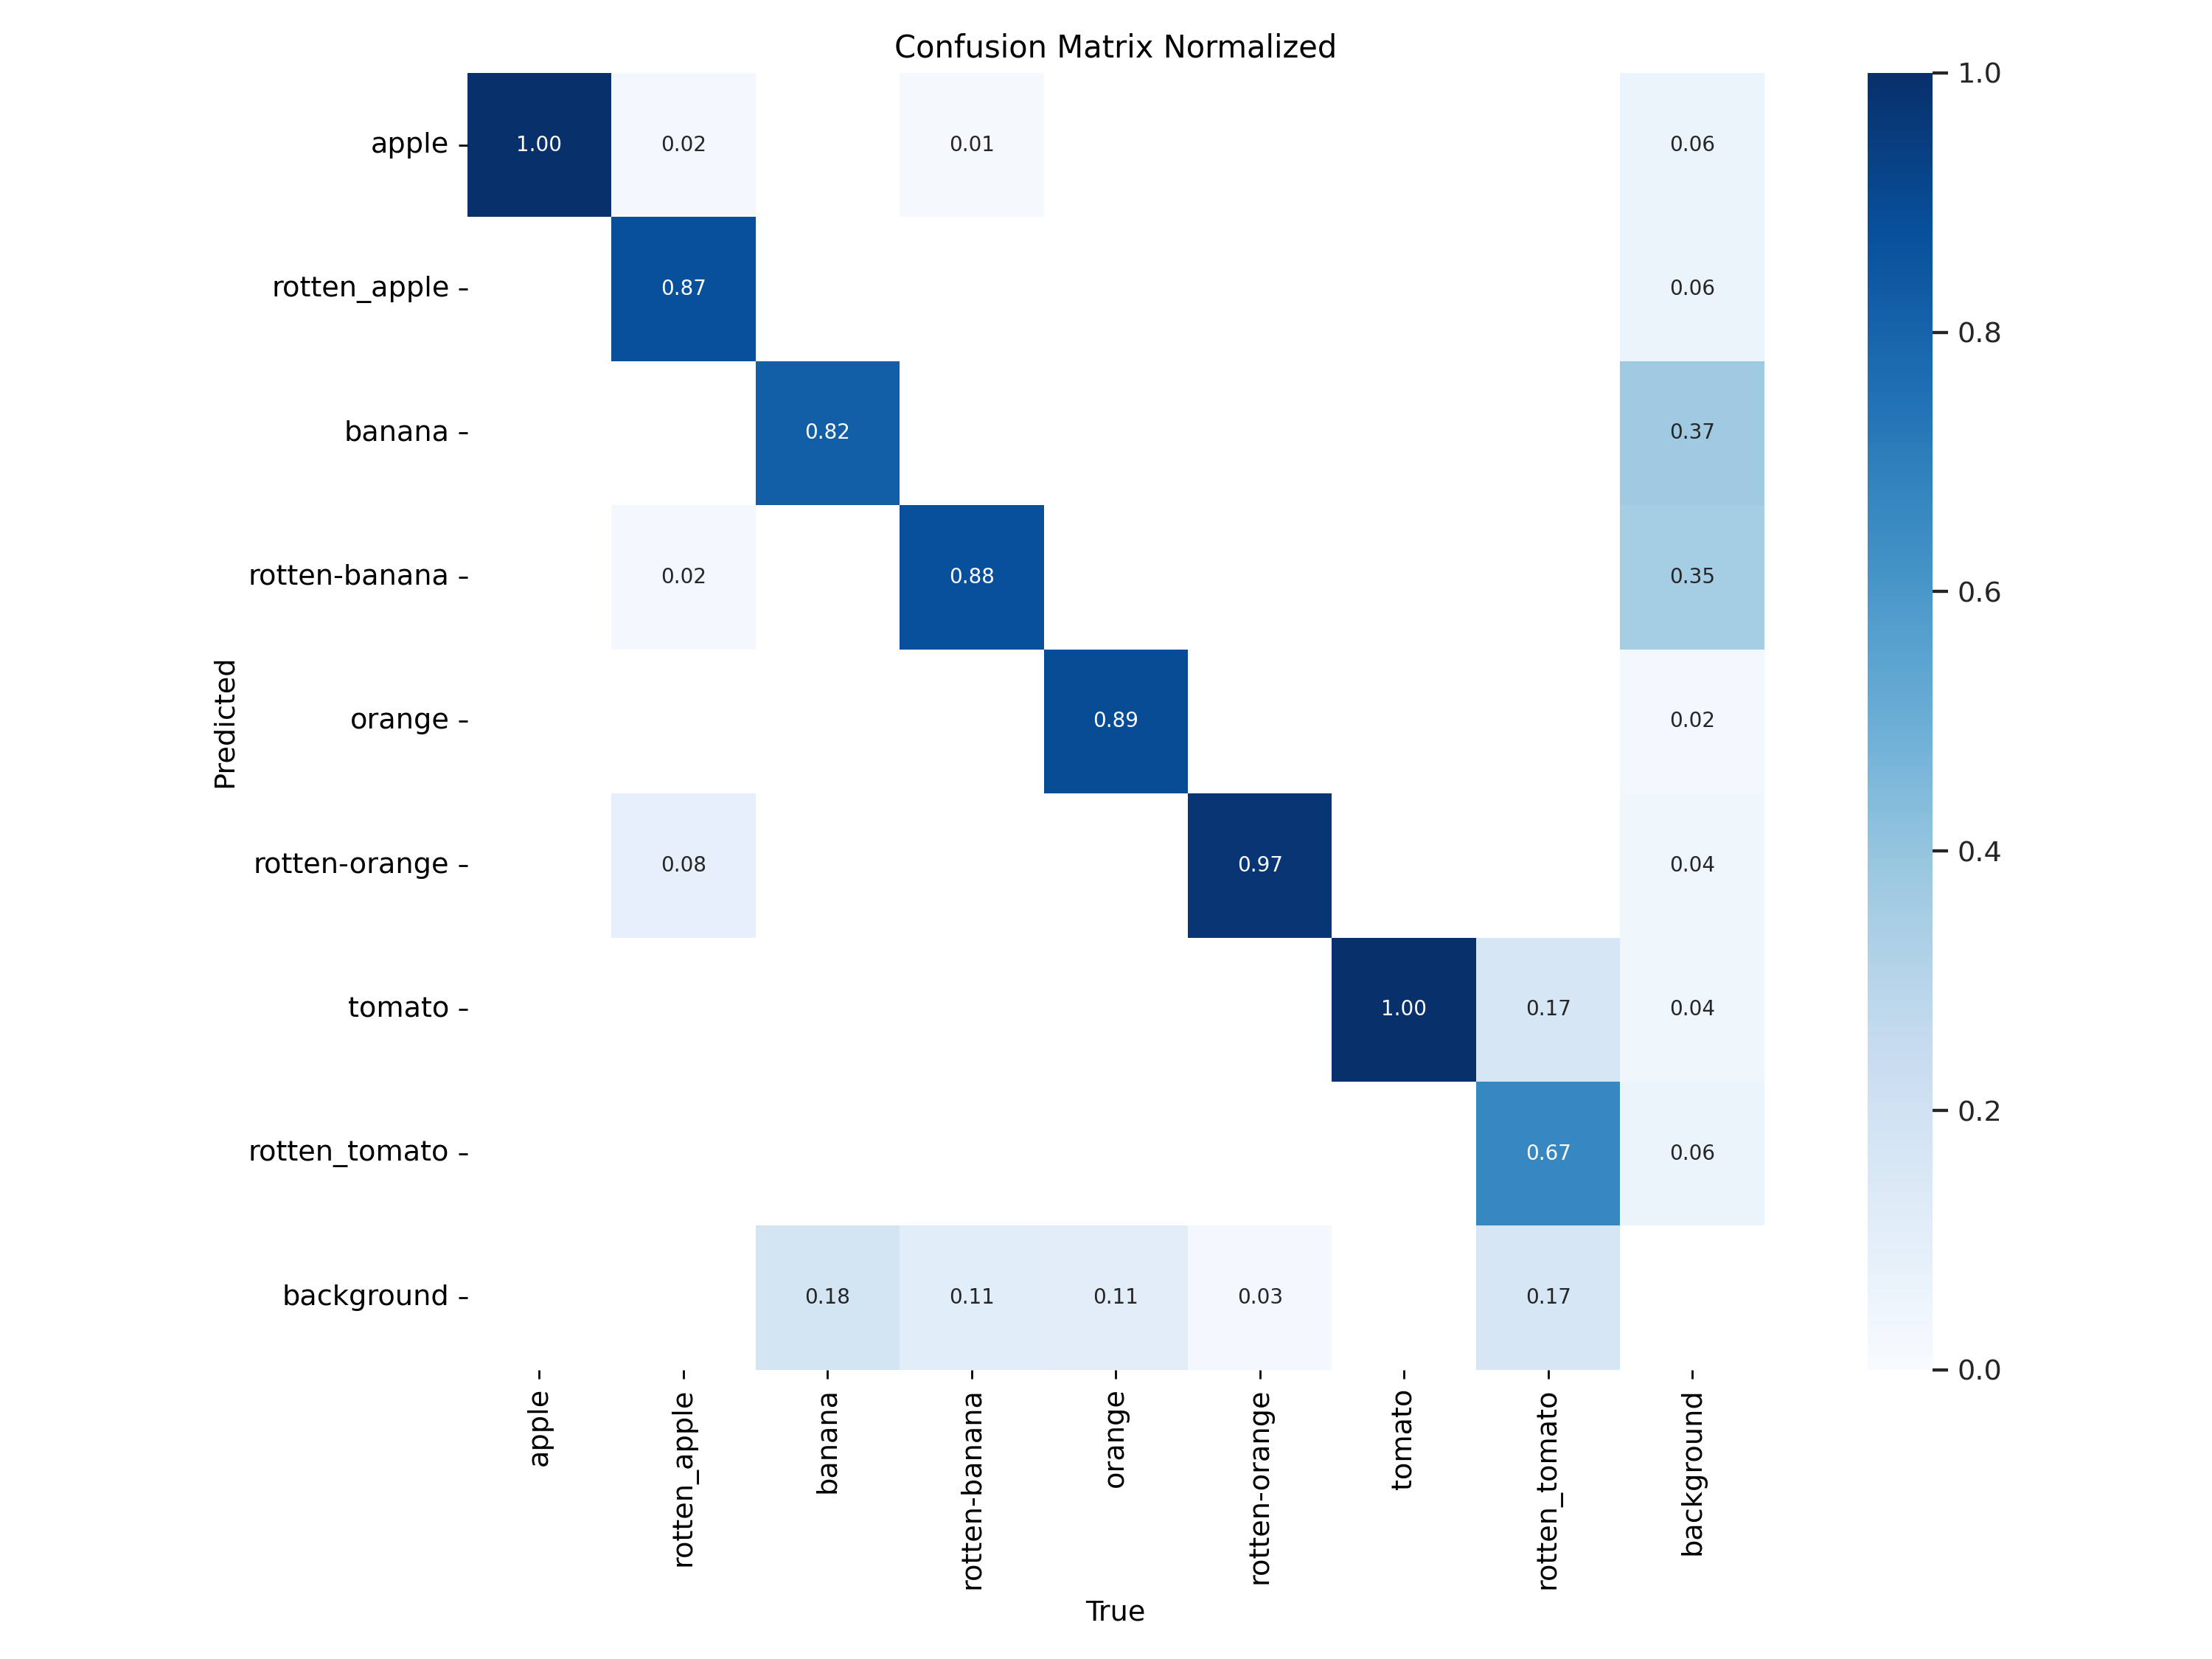

In [32]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train2/confusion_matrix_normalized.png')

PREDICTION

In [37]:
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('/content/runs/detect/images/banana_orange_apple_red.jpg', save=True)


image 1/1 /content/runs/detect/images/banana_orange_apple_red.jpg: 640x640 3 apples, 3 bananas, 2 oranges, 16.3ms
Speed: 3.6ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


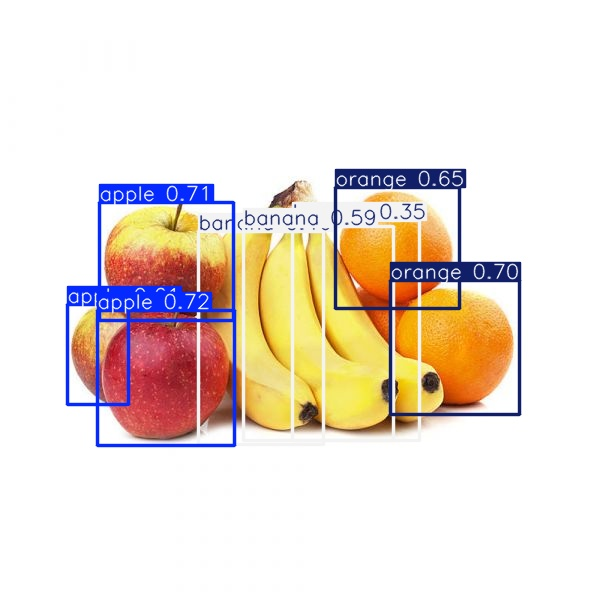

In [38]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict3/banana_orange_apple_red.jpg')

In [35]:
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('/content/runs/detect/images/stock-photo-fresh-and-rotten-tomatoes-isolated-on-white-428871130.jpg', save=True)


image 1/1 /content/runs/detect/images/stock-photo-fresh-and-rotten-tomatoes-isolated-on-white-428871130.jpg: 480x640 1 apple, 1 rotten-orange, 40.7ms
Speed: 2.6ms preprocess, 40.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2


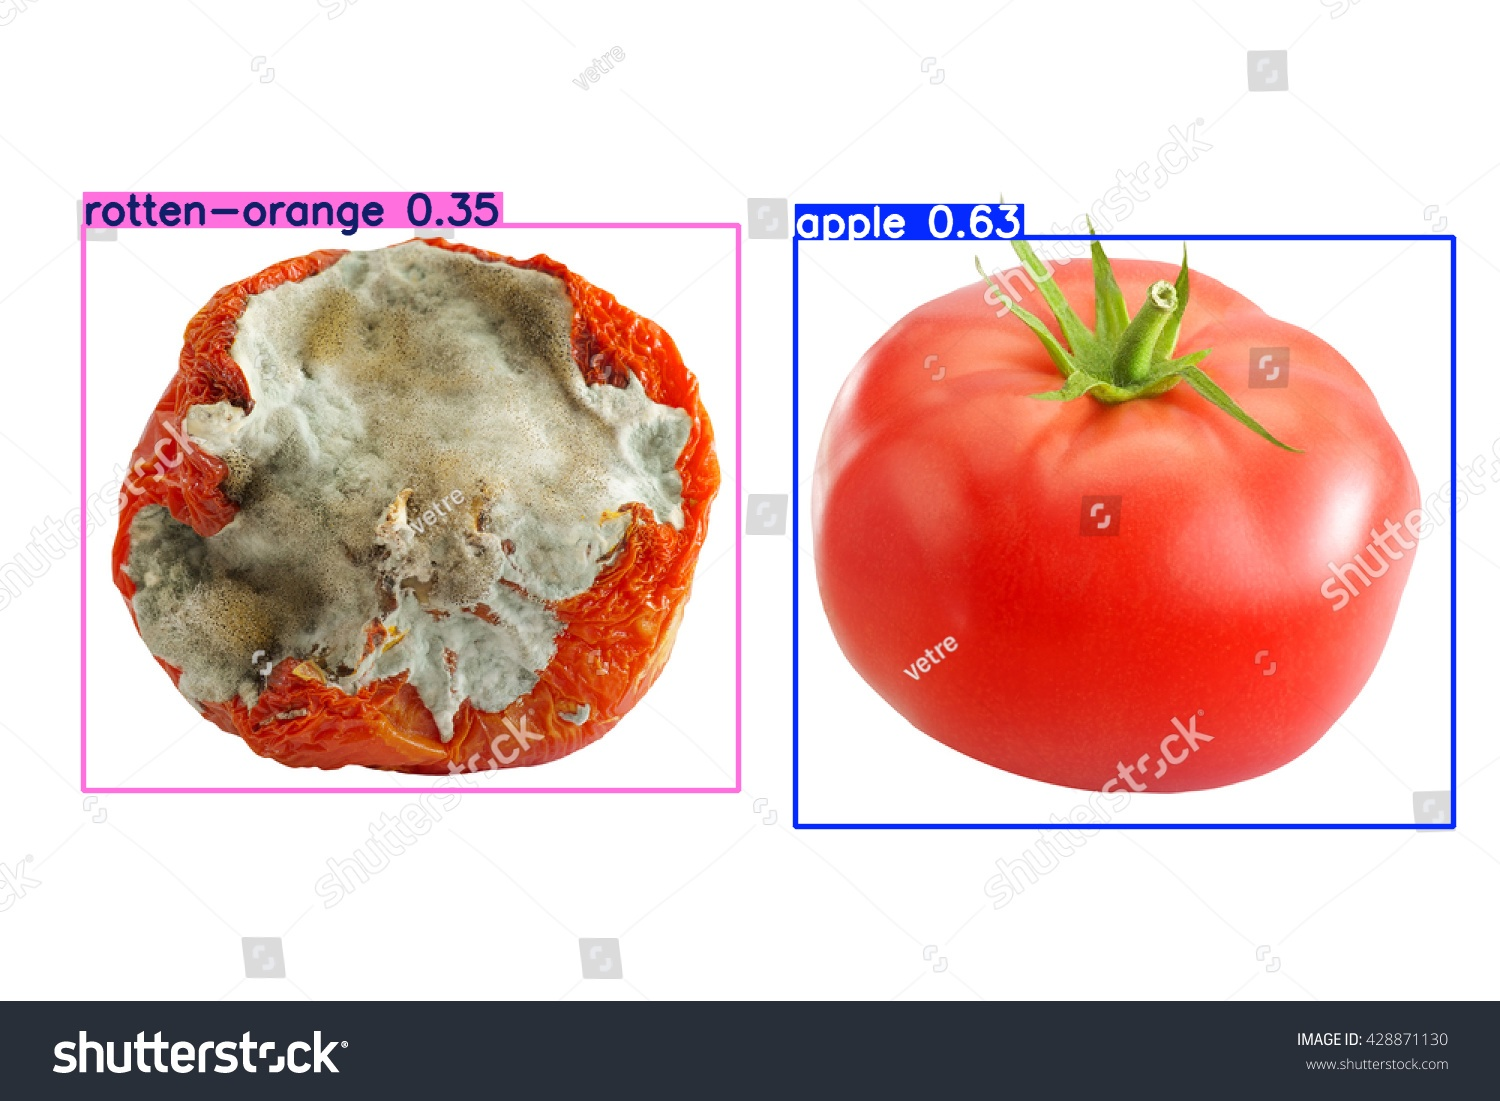

In [36]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict2/stock-photo-fresh-and-rotten-tomatoes-isolated-on-white-428871130.jpg')

In [33]:
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('https://www.freshpoint.com/wp-content/uploads/2019/08/freshpoint-produce-101-apples-bananas.jpg', save=True)

100%|██████████| 126k/126k [00:00<00:00, 595kB/s]


image 1/1 /content/freshpoint-produce-101-apples-bananas.jpg: 576x640 2 apples, 2 bananas, 249.6ms
Speed: 4.6ms preprocess, 249.6ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict


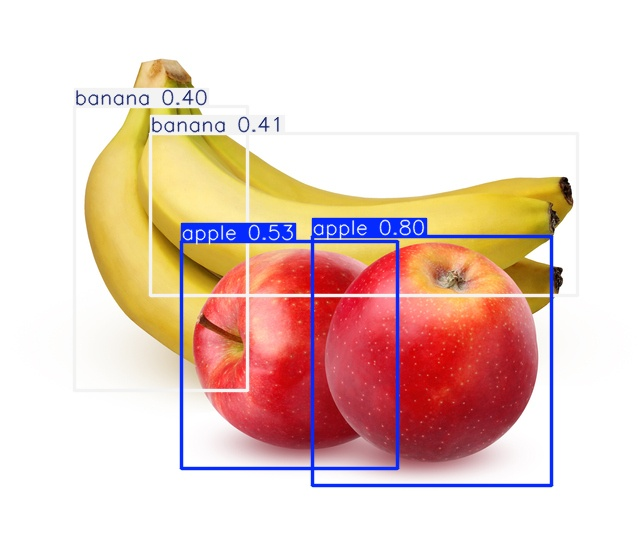

In [34]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict/freshpoint-produce-101-apples-bananas.jpg')